<a href="https://colab.research.google.com/github/JinseokCodeDiary/1st-Rep/blob/master/AIFFEL_quest/quest01/pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전설 포켓몬 찾기
데이터 살펴보기

In [137]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report





file_path = '/kaggle/Pokemon.csv'

data = pd.read_csv(file_path)

pokemon = data.copy()
print(pokemon.shape)


(800, 13)


#전설포켓몬 특성 데이터 살펴보기

전설포켓몬 - 65개

In [33]:
lp = pokemon[pokemon['Legendary'] == True]
print(lp.shape)
lp


(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


결측치- 데이터 특성상 하나의 타입만 가질 수 있으므로 결측치처리 하지않음

In [10]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

# 컬럼 살펴보기

'#' : 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 '#'같은값을 가진다. int \
Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) str\
Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str\
Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str\
Total : 전체 6가지 스탯의 총합. int\
HP : 포켓몬의 체력. int\
Attack : 물리 공격력. (scratch, punch 등) int\
Defense : 물리 공격에 대한 방어력. int\
Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) int\
Sp. Def : 특수 공격에 대한 방어력. int\
Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) int\
Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int\
Legendary : 전설의 포켓몬 여부. !! Target feature !! bool

In [13]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# Legendary와의 다른 특성과의 상관관계

스텟 종합에서 전설이 높은 수치에 주로 분포되어 있어 참고할 수 있다고 판단함

개별 스텟에서 전설이 높은 수치에 주로 분포되어 있어 참고할 수 있다고 판단함


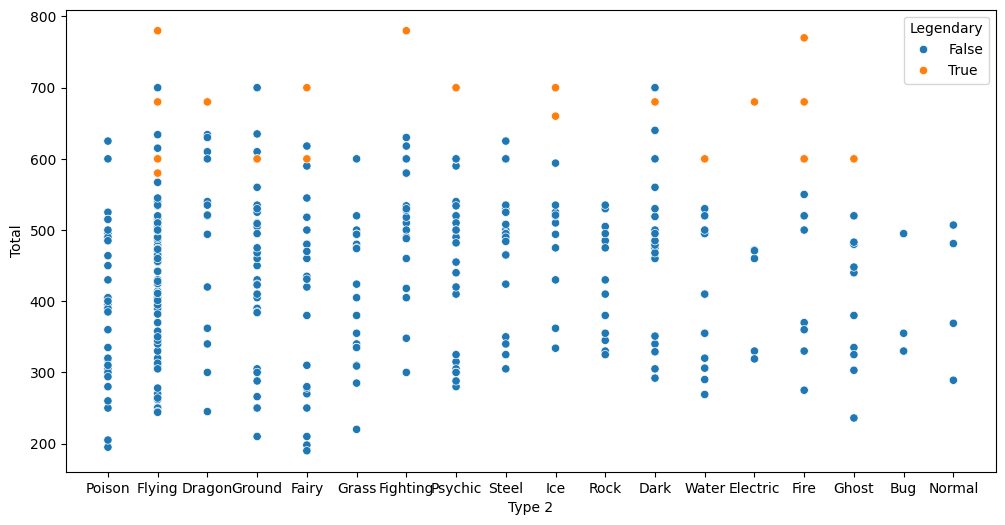

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 2", y="Total", hue="Legendary")
plt.show()

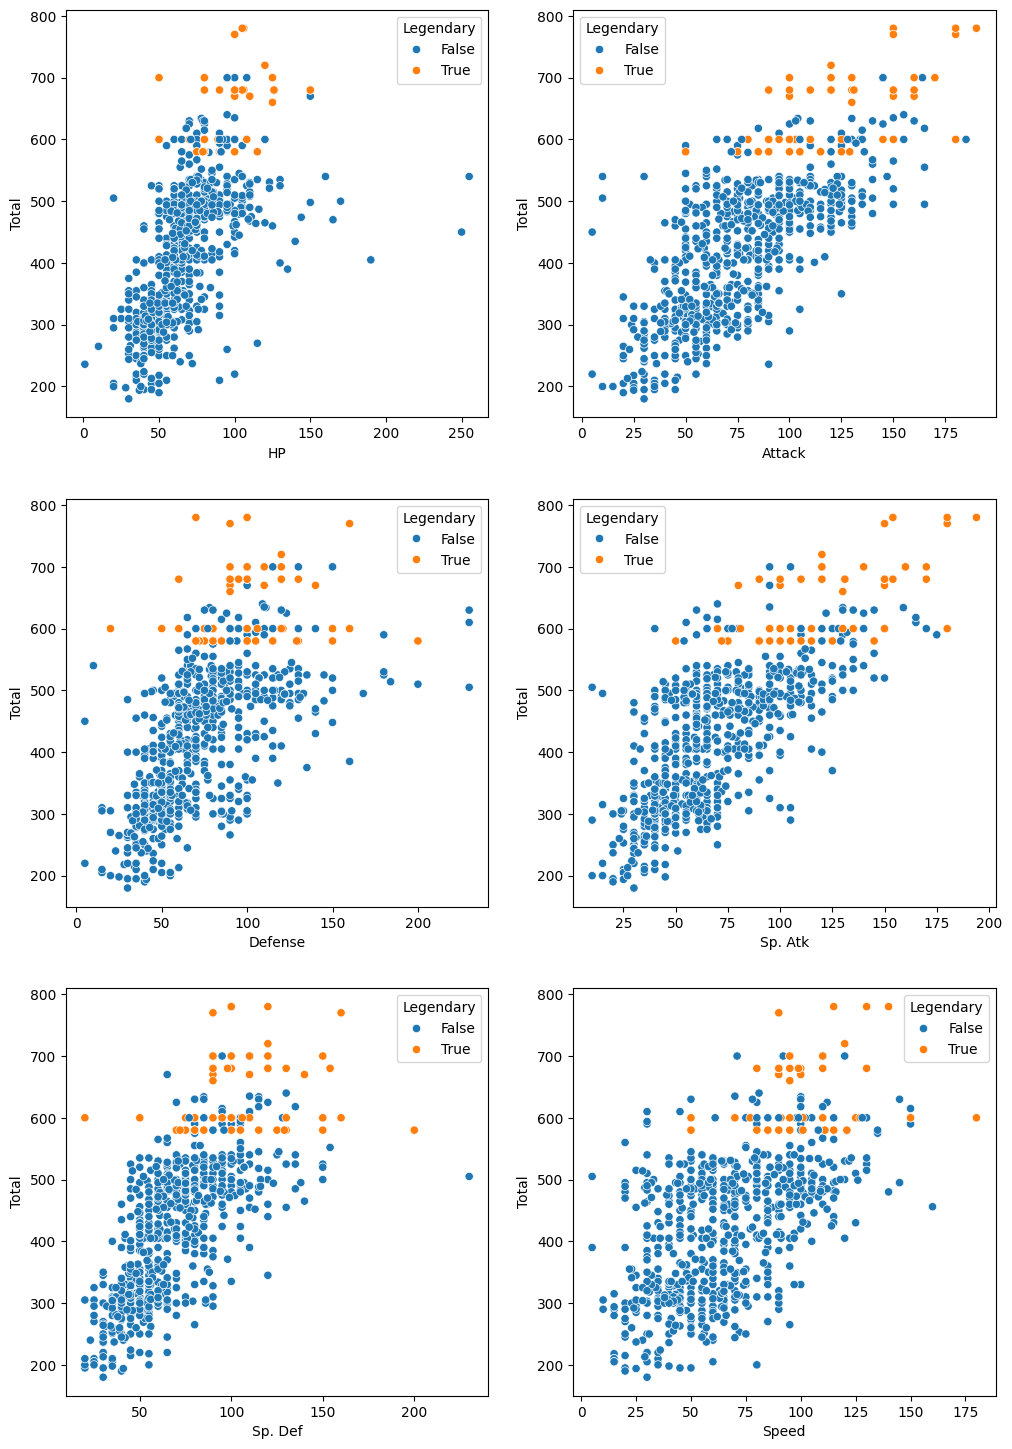

In [20]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)


sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
plt.show()

전설포켓몬과 type과의 관계

In [34]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

type 1은 18개, type 2는 19개

In [35]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

tpye2는 type1의 모든 요소값을 가지고 있고 남은 하나의 값은 nan이다

In [36]:
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


In [37]:
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


전설 포켓몬은 type1에서 flying의 비율이 50%이고 type 1,2어느것도 bug와 poison의 값을 가지지 않는다는 점에서 참고할 수 있다고 판단함

In [73]:
types = list(set(pokemon["Type 1"]) | set(pokemon["Type 2"]))
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Fire,Rock,Steel,Ice,Bug,Fairy,Psychic,Water,...,NaN,Poison,Normal,Ground,Dragon,Fighting,Flying,Dark,Grass,Electric
0,Grass,Poison,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,Grass,Poison,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,Grass,Poison,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,Grass,Poison,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,Fire,NaN,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


전설포켓몬과 세대관의 관계

(735, 32)
(65, 32)


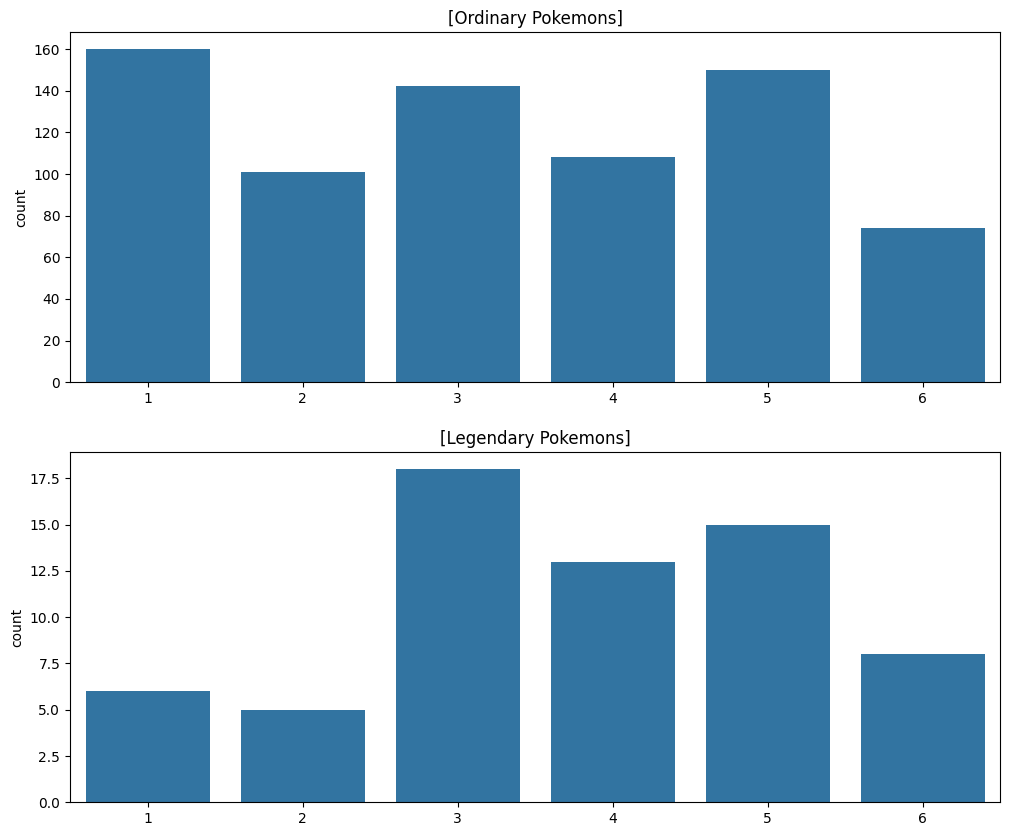

In [41]:
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

전설포켓몬과 이름과의 관계 - 전설포켓몬은 특정 단어가 포함된 경우가 많아 이름이 긴 경우가 많다. 일반 포켓몬의 이름이 거의 10글자내것에 비해 전설포켓몬은 그보다 긴경우도 많다

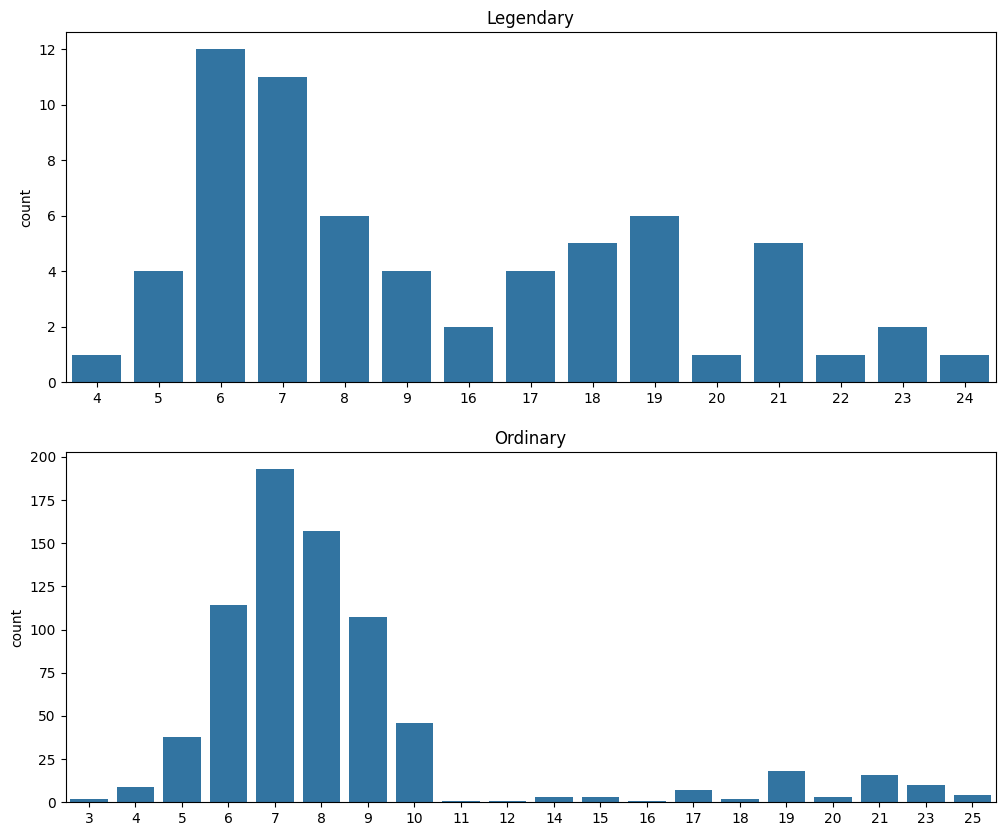

In [44]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))

plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [45]:
print('전설포켓몬 이름이 10글자보다 긴 경우의 확률')
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")
print('일반포켓몬 이름이 10글자보다 긴 경우의 확률')
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

전설포켓몬 이름이 10글자보다 긴 경우의 확률
41.54 %
일반포켓몬 이름이 10글자보다 긴 경우의 확률
15.65 %


In [70]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon["long_name"] = pokemon["name_count"] >= 10

전설 포켓몬 이름에 많이 포함 단어

In [123]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]


(0, 56)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Rayquaza,Incarnate,Therian,Diancie,Primal,Giratina,Shaymin,Tornadus,Thundurus,Landorus


In [121]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Rayquaza,Incarnate,Therian,Diancie,Primal,Giratina,Shaymin,Tornadus,Thundurus,Landorus
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,...,False,False,False,False,False,False,False,False,False,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,...,False,False,False,False,False,False,False,False,False,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,...,False,False,False,False,False,False,False,False,False,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,...,False,False,False,False,False,False,False,False,False,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,...,False,False,False,False,False,False,False,False,False,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,...,False,False,False,False,False,False,False,False,False,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,...,False,False,False,False,False,False,False,False,False,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,...,False,False,False,False,False,False,False,False,False,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,...,False,False,False,False,False,False,False,False,False,False


In [122]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Rayquaza,Incarnate,Therian,Diancie,Primal,Giratina,Shaymin,Tornadus,Thundurus,Landorus


In [124]:
def tokenize(name):
    tokens = []
    name_split = name.split(" ")
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
    tokens

    return np.array(tokens)

all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

most_common = Counter(token_set).most_common(10)
most_common

for token, _ in most_common:
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Rayquaza,Incarnate,Therian,Diancie,Primal,Giratina,Shaymin,Tornadus,Thundurus,Landorus
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,False,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,False,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,False,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


원본데이터 모델 정확도

In [125]:
print(data.shape)
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
X = data[features]
target = 'Legendary'
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

(800, 13)
(640, 8) (640,)
(160, 8) (160,)
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [126]:
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

학습시킨데이터

In [127]:
print(len(pokemon.columns))
print(pokemon.columns)

56
Index([           '#',         'Name',       'Type 1',       'Type 2',
              'Total',           'HP',       'Attack',      'Defense',
            'Sp. Atk',      'Sp. Def',        'Speed',   'Generation',
          'Legendary',   'name_count',    'long_name', 'Name_nospace',
       'name_isalpha',         'Fire',         'Rock',        'Steel',
                'Ice',          'Bug',        'Fairy',      'Psychic',
              'Water',        'Ghost',            nan,       'Poison',
             'Normal',       'Ground',       'Dragon',     'Fighting',
             'Flying',         'Dark',        'Grass',     'Electric',
              'Forme',         'Mega',       'Mewtwo',       'Kyurem',
             'Deoxys',        'Hoopa',       'Latias',       'Latios',
             'Kyogre',      'Groudon',     'Rayquaza',    'Incarnate',
            'Therian',      'Diancie',       'Primal',     'Giratina',
            'Shaymin',     'Tornadus',    'Thundurus',     'Landorus'],
  

In [110]:
features = [ 'Total',           'HP',       'Attack',      'Defense',
            'Sp. Atk',      'Sp. Def',        'Speed',   'Generation',
          'Legendary',   'name_count',    'long_name', 'Name_nospace',
       'name_isalpha',         'Fire',         'Rock',        'Steel',
                'Ice',          'Bug',        'Fairy',      'Psychic',
              'Water',        'Ghost',        'Poison',
             'Normal',       'Ground',       'Dragon',     'Fighting',
             'Flying',         'Dark',        'Grass',     'Electric',
              'Forme',         'Mega',       'Mewtwo',       'Kyurem',
             'Deoxys',        'Hoopa',       'Latias',       'Latios',
             'Kyogre',      'Groudon',     'Rayquaza',    'Incarnate',
            'Therian',      'Diancie',       'Primal',     'Giratina',
            'Shaymin',     'Tornadus',    'Thundurus',     'Landorus']
len(features)

51

In [128]:
target = "Legendary"
X = pokemon[features]

In [143]:
y = pokemon[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(640, 8) (640,)
(160, 8) (160,)


In [142]:
model = DecisionTreeClassifier(random_state=25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
model.fit(X_train, y_train)


from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy}")

모델 정확도: 0.9375
